#CVPR Lab 6

SIFT feature descriptors


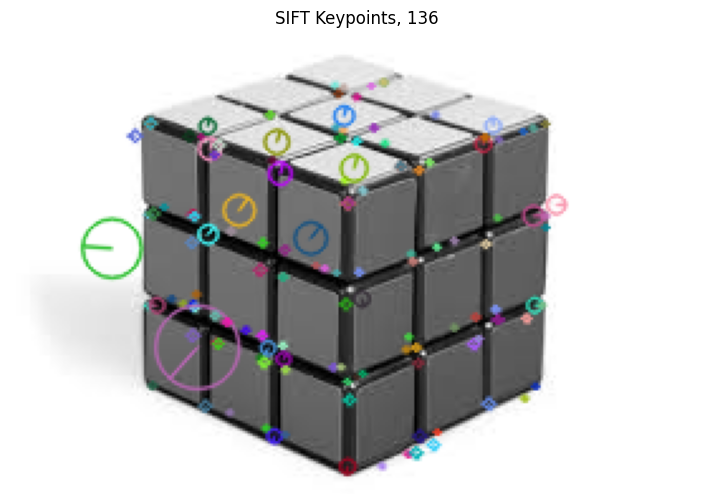

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("Rubic.jpeg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints on the image
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.figure(figsize=(10, 6))
plt.imshow(sift_image, cmap="gray")
plt.title(f"SIFT Keypoints, {len(keypoints)}")
plt.axis("off")
plt.show()


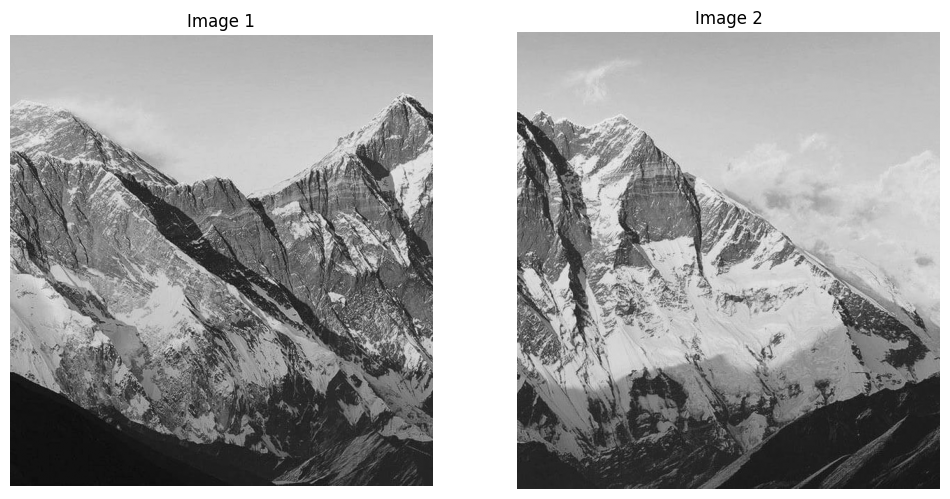

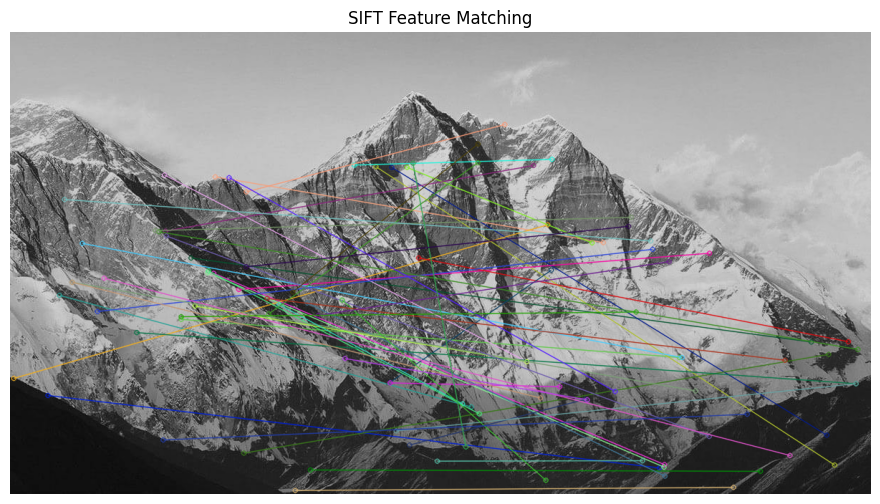

In [ ]:
# Load two images
img1 = cv2.imread("Mountain1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Mountain2.jpg", cv2.IMREAD_GRAYSCALE)

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Initialize Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches based on distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display image1
axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Image 1")
axes[0].axis("off")

# Display image2
axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Image 2")
axes[1].axis("off")

# Show the figure
plt.show()

# Display the matched image
plt.figure(figsize=(12, 6))
plt.imshow(matched_image)
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()
